In [348]:
from numpy import *
import scipy as sp
from scipy.stats import zscore
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
set_printoptions(precision=4)

In [278]:
#  Compute 1 x M row vector of square distances for M x N and 1 x N
#    data U and v, respectively.
def square_dist(U,v):
    out = sum(square(U-v), axis=-1)
    return out

In [279]:
#  Create two random row vectors
v = array([2, 3, 5, 7, 8])
u = array([2, 5, 7, 8, 8])

In [280]:
#  Compute the square distance
sq_dist = square_dist(v, u)
sq_dist

9

In [281]:
#  Compute the Euclidean distance
euclid_dist = sqrt(sq_dist)
euclid_dist

3.0

In [282]:
#  Compute the Euclidean distance between a row vector 1 X N and an
#    M x N matrix
A = array([[1, 4, 3, 3, 2],
           [3, 2, 1, 2, 2],
           [1, 3, 2, 2, 2],
           [1, 4, 5, 6, 7]])
sq_dist = square_dist(A,v)
sq_dist

array([58, 79, 71,  4])

In [283]:
#  Compute the Euclidean distance
sqrt(sq_dist)

array([7.6158, 8.8882, 8.4261, 2.    ])

In [284]:
#  name of the file to be loaded
filename = 'data.txt'

#  split data at specified delimiter
delimiter = '\t'

#  read_csv to read in the data file with no header and convert to numpy array using as_matrix
A = pd.read_csv(filename, sep=delimiter, header=None).as_matrix()

pd.read_csv(filename, sep=delimiter, header=None)

,0,1,2,3,4,5
0,3,7,4,9,9,7
1,7,5,5,3,8,8
2,7,5,5,0,8,4
3,5,6,8,5,9,8
4,5,8,8,8,10,9
5,7,7,8,4,7,8


In [285]:
# Critic 3 ratings for all movies
A[2,:]

array([7, 5, 5, 0, 8, 4])

In [286]:
#  Check the dimensions of A (i.e. rows are critics, columns are movies)
A.shape

(6, 6)

## Movie 4 vs. Movie 6 Ratings

<IPython.core.display.Javascript object>


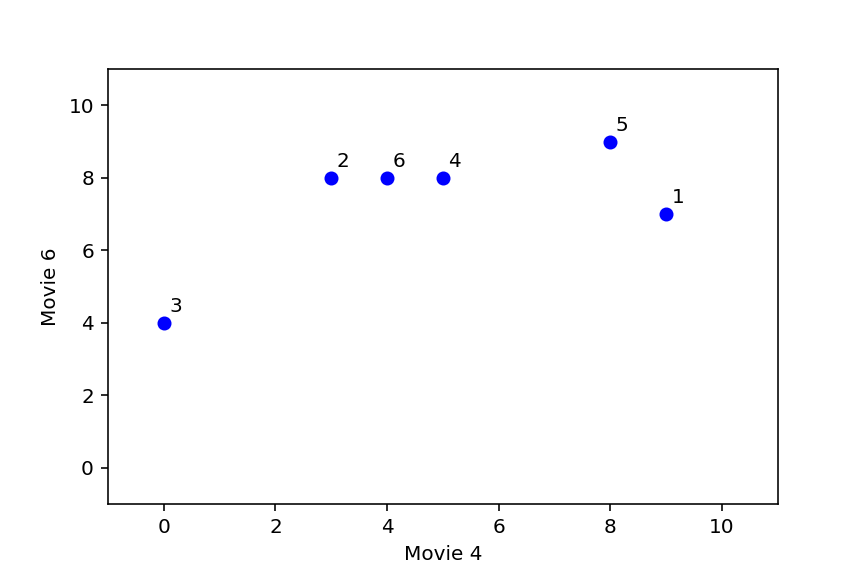

In [287]:
x = A[:,3]
y = A[:,5]
plt.plot(x, y, 'bo')
plt.axis([-1, 11, -1, 11])
plt.xlabel('Movie 4')
plt.ylabel('Movie 6')
dx = .1
dy = .3
for i in range(0, x.size):
    plt.annotate(i+1,(x[i]+dx, y[i]+dy))
plt.show()

## Crtict 1 vs. Critic 6 Ratings

<IPython.core.display.Javascript object>


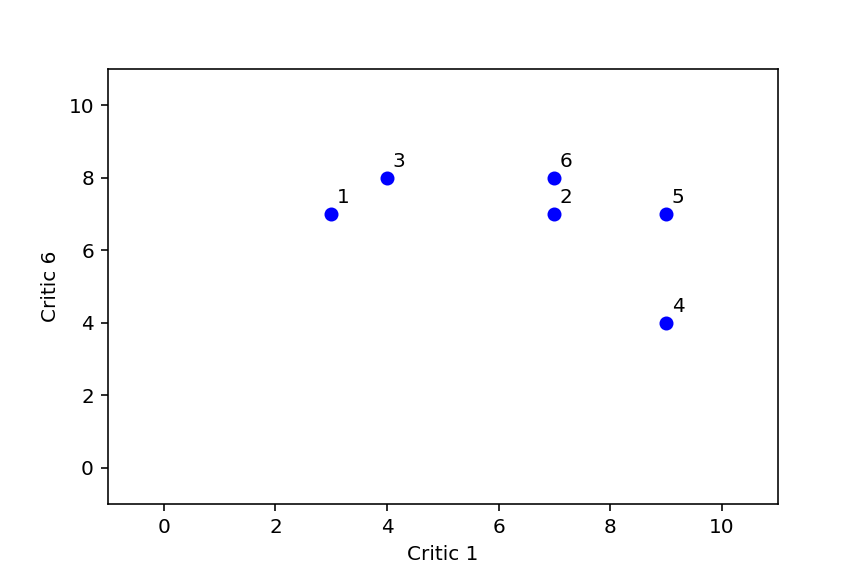

In [288]:
#  Critic 1's ratings
x = A[0,:]

#  Critic 6's ratings
y = A[5,:]

plt.plot(x, y, 'bo')
plt.axis([-1, 11, -1, 11])
plt.xlabel('Critic 1')
plt.ylabel('Critic 6')
dx = .1
dy = .3

for i in range(0, x.size):
    plt.annotate(i+1,(x[i]+dx, y[i]+dy))

plt.show()

# 3.1 Compute Euclidean distance between critics

In [161]:
#  Get matrix size
row, col = A.shape

#  Create a row X row matrix of zeros
critic_dist = zeros((row,row))

#  for each critic compute his distance with all the other critics
for i in range(0, row):
    critic_dist[i,:] = sqrt(square_dist(A, A[i,:]))
    
print(critic_dist)

[[ 0.      7.6811 10.583   6.1644  5.1962  7.874 ]
 [ 7.6811  0.      5.      4.3589  7.2111  3.873 ]
 [10.583   5.      0.      7.4833 10.7238  6.7823]
 [ 6.1644  4.3589  7.4833  0.      3.873   3.1623]
 [ 5.1962  7.2111 10.7238  3.873   0.      5.5678]
 [ 7.874   3.873   6.7823  3.1623  5.5678  0.    ]]


#### Exercise
Compute the Euclidean distance between the movies in the 6-dimensional review space.

In [162]:
movie_dist = zeros((row,row))

for i in range(0, row):
    movie_dist[i,:] = sqrt(square_dist(A.T, A.T[i,:]))
    
print(movie_dist)

[[ 0.      5.831   5.2915 10.9087  8.8882  7.2111]
 [ 5.831   0.      3.7417  6.5574  5.9161  4.    ]
 [ 5.2915  3.7417  0.      8.8882  7.      4.4721]
 [10.9087  6.5574  8.8882  0.     10.8628  8.4261]
 [ 8.8882  5.9161  7.     10.8628  0.      4.7958]
 [ 7.2111  4.      4.4721  8.4261  4.7958  0.    ]]


# 3.2 User Ratings
Consider that we have two new users, User1 and User2, who reviewed a subset of movies. Based on those
ratings we want to find to which critic is each user most similar. Then, based on this information we can build
a simple recommender system that will propose which movie each user should see based on their individual
preferences.

Let’s assume, User1 has rated Movie4 with 2 and Movie6 with 7, and User2 has rated Movie2 with 6,
Movie3 with 9 and Movie6 with 6. We will compute the Euclidean distance of each user to all the critics and
find the closest ones (i.e. the most similar ones). Note, that we can compute this distance only on the movies
that the user has seen!

In [163]:
#  User1 actual ratings
u1_scores = array([2, 7])

#  Indices of movies that User1 reviewed
u1_movies = array([3, 5])

#  User2 actual ratings
u2_scores = array([6, 9, 6])

#  Indices of movies that User2 reviewed
u2_movies = array([1, 2, 5])

#  Compute Euclidean distance between each user and critics
u1_critic_dist = sqrt(square_dist(A[:,u1_movies], u1_scores))
print("u1_critic_dist = " + str(u1_critic_dist))

u2_critic_dist = sqrt(square_dist(A[:,u2_movies], u2_scores))
print("u2_critic_dist = " + str(u2_critic_dist))


u1_critic_dist = [7.     1.4142 3.6056 3.1623 6.3246 2.2361]
u2_critic_dist = [5.1962 4.5826 4.5826 2.2361 3.7417 2.4495]


We observe that User1 is most similar with Critic 2 and User2 is most similar with Critic 4. Thus, a simple
approach to fill the ’missing’ user reviews for the rest of the movies, is to use $x_{c∗m}$ for $\hat{x}_{um}$, where $x_{c∗m}$ is the review of critic c for movie m, and $\hat{x}_{um}$ is the predicted review for user u for movie m.
To visualize the distances between users and critics, Figure 2 shows the plot of critics together with the User2
reviews in the 3-dimensional review space.

<IPython.core.display.Javascript object>


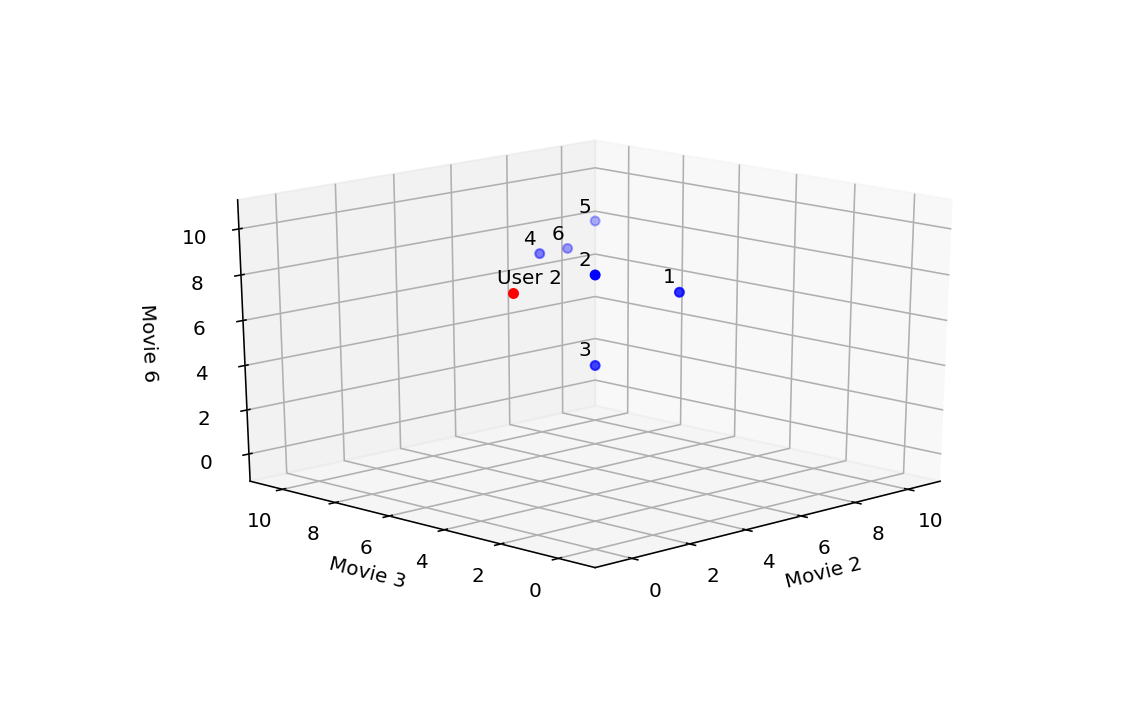

In [184]:
#  Critic reviews vector space
x = A[:,1] # x-axis
y = A[:,2] # y-axis
z = A[:,5] # z-axis

#  Create 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#  Plot the data
ax.scatter(x, y, z, c='b')

#  Set axes labels
ax.set_xlabel('Movie 2')
ax.set_ylabel('Movie 3')
ax.set_zlabel('Movie 6')

#  Set axes limits
ax.set_xlim3d(-1, 11)
ax.set_ylim3d(-1,11)
ax.set_zlim3d(-1,11)

#  Set plot intial asimuth and elevation
ax.view_init(elev=20., azim=-135)

#  displacement so the text does not overlay the data points
dx = 0.1
dy = 0.7
dz = 0.2;

#  Plot the labels
for i in range(len(x)):
    ax.text(x[i]+dx, y[i]+dy, z[i]+dz, str(i+1))


#  Plot User 2's scores
X = u2_scores[0]
Y = u2_scores[1]
Z = u2_scores[2]

ax.scatter(X, Y, Z, c='r')
ax.text(X+dx, Y+dy, Z+dz, "User 2")
fig.show()

#### Exercise
Create a plot of critics in a 2-dimensional review space together with the User1 reviews for Movie 4 and
Movie 6.

<IPython.core.display.Javascript object>


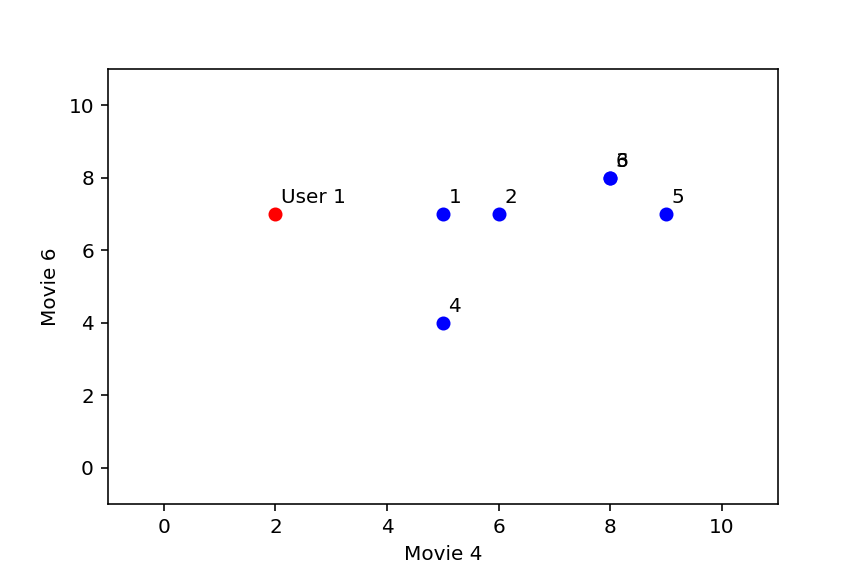

In [199]:
x = A[3,:]
y = A[5,:]

plt.plot(x, y, 'bo')
plt.axis([-1, 11, -1, 11])
plt.xlabel('Movie 4')
plt.ylabel('Movie 6')
dx = .1
dy = .3

for i in range(0, x.size):
    plt.annotate(i+1,(x[i]+dx, y[i]+dy))

#  Plot User 1's scores
X = u1_scores[0]
Y = u1_scores[1]

plt.plot(X, Y, 'ro')
plt.annotate('User 1', (X+dx, Y+dy))
    
plt.show()

# 4 Similarity Measure

In [200]:
def sim_measure(r2):
    return 1/(1+r2)

Now we can compute the critics’ similarities to User2, by converting the Euclidean distances between critics
and User2 to similarity measures as follows:

In [216]:
u2_sim = sim_measure(u2_critic_dist)
print("u2_sim = " + str(u2_sim))

u2_sim = [0.1614 0.1791 0.1791 0.309  0.2109 0.2899]


# 4.1 Making recommendations
One way to make a recommendation for User2 would be to choose the most similar critic, and then propose
the movie that they ranked most highly; however this approach has a couple of drawbacks (see lecture notes).
An alternative approach is to take an weighted average over critics, that is, to weight critic scores according to
the similarity between the critic and user. An overall score for each movie can be obtained by summing these
weighted rankings.

We can now estimate User2 reviews for each unseen movie using the above equation:

In [231]:
#  Predict user2 reviews
u2_pred_rev = (1/sum(u2_sim)) * dot(u2_sim, A)
print("u2_pred_rev = " + str(u2_pred_rev))

u2_pred_rev = [5.7323 6.3872 6.706  4.8003 8.453  7.4983]


In [232]:
#  Get only the ones that user2 has not reviewed
u2_pred_only = u2_pred_rev[setdiff1d(array(range(0,5)), u2_movies)]
print("u2_pred_only = " + str(u2_pred_only))

u2_pred_only = [5.7323 4.8003 8.453 ]


Note that the above code predicts reviews for all possible movies, even though we might have an actual rating
from the user in some of them. We can simply take only the ones that the user has not reviewed yet and ignore
the others.

Hence, the recommender system would propose Movie 5 to User2. But more than just proposing a single
film, it provides an estimate of the rating that User2 would provide to each film based on User2s ratings of
other films, the estimated similarity of User2 to each critic, and the ratings of the critics to films unseen by
User2.

#### Exercise

In [240]:
u1_sim = sim_measure(u1_critic_dist)
u1_pred_rev = (1/sum(u1_sim)) * dot(u1_sim, A)
u1_pred_only = u1_pred_rev[setdiff1d(array(range(0,5)), u1_movies)]
print("u1_pred_rev = " + str(u1_pred_rev))
print("u1_pred_only = " + str(u1_pred_only))

u1_pred_rev = [6.1308 6.0525 6.3399 4.0892 8.2283 7.4058]
u1_pred_only = [6.1308 6.0525 6.3399 8.2283]


Thus, we should recomend movie 5 to user 1.

# 5 Normalization
So far, our estimate of similarity has been based on the Euclidean distance between feature vectors in the
original review space. However, this distance is not well normalised. For example, two critics may rank a set
of films in the same order, but if one critic gives consistently higher scores to all movies than the other, then the
Euclidean distance will be large and the estimated similarity will be small.

One way to normalise the scores given by each critic is to transform each score into a standard score (also called
z-score). The standard scores are defined such that the set of scores given by each critic have the same sample
mean and sample standard deviation. (Important: Many systems actually work better when you pre-process
the data and use standarized features).

In [316]:
#  Compute the sample mean for each critic
x_cm = mean(A, axis=1)
print("x_cm = " + str(x_cm))

#  Compute the sample standard deviation
s_c = std(A, axis=1, ddof=1)
print("s_c = " + str(s_c))


x_cm = [6.5    6.     4.8333 6.8333 8.     6.8333]
s_c = [2.51   2.     2.7869 1.7224 1.6733 1.472 ]


In [342]:
#  Because of the way broadcasting works in numpy, we must first transpose matrix A to
#    apply the operations to A correctly and then transpose A back in the end.
z_cm = ((A.T-x_cm)/s_c).T
print("z_cm = " + str(z_cm))

z_cm = [[-1.3944  0.1992 -0.996   0.996   0.996   0.1992]
 [ 0.5    -0.5    -0.5    -1.5     1.      1.    ]
 [ 0.7775  0.0598  0.0598 -1.7343  1.1363 -0.299 ]
 [-1.0644 -0.4838  0.6773 -1.0644  1.2579  0.6773]
 [-1.7928  0.      0.      0.      1.1952  0.5976]
 [ 0.1132  0.1132  0.7926 -1.9249  0.1132  0.7926]]


In [350]:
#  Equivalent method using scipy
print("z_cm = " + str(zscore(A, axis=1, ddof=1)))

z_cm = [[-1.3944  0.1992 -0.996   0.996   0.996   0.1992]
 [ 0.5    -0.5    -0.5    -1.5     1.      1.    ]
 [ 0.7775  0.0598  0.0598 -1.7343  1.1363 -0.299 ]
 [-1.0644 -0.4838  0.6773 -1.0644  1.2579  0.6773]
 [-1.7928  0.      0.      0.      1.1952  0.5976]
 [ 0.1132  0.1132  0.7926 -1.9249  0.1132  0.7926]]


<IPython.core.display.Javascript object>


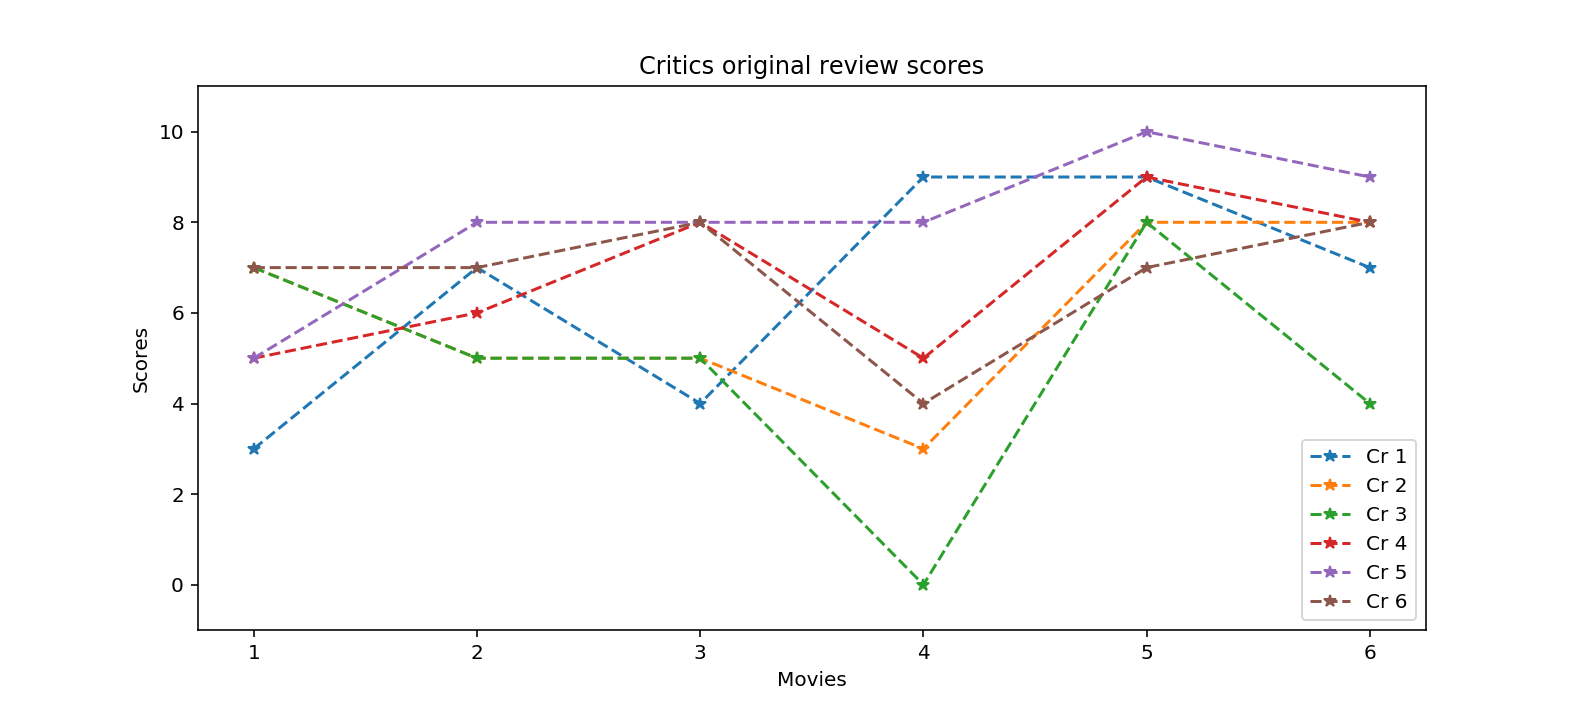

In [401]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111)

ax.set_ylim(-1,11)
ax.set_xlabel('Movies')
ax.set_ylabel('Scores')
ax.set_title('Critics original review scores')
ax.plot(array(range(1,7)), A.T, '--*')
ax.legend(['Cr 1', 'Cr 2', 'Cr 3', 'Cr 4', 'Cr 5', 'Cr 6'], loc='lower right')
fig.show()


**Figure 3:** *Original critics review scores (y-axis) for each movie (x-axis). Each coloured line represents
a different critic, and each star denotes the actual rating of that critic for the specific movie.*

<IPython.core.display.Javascript object>


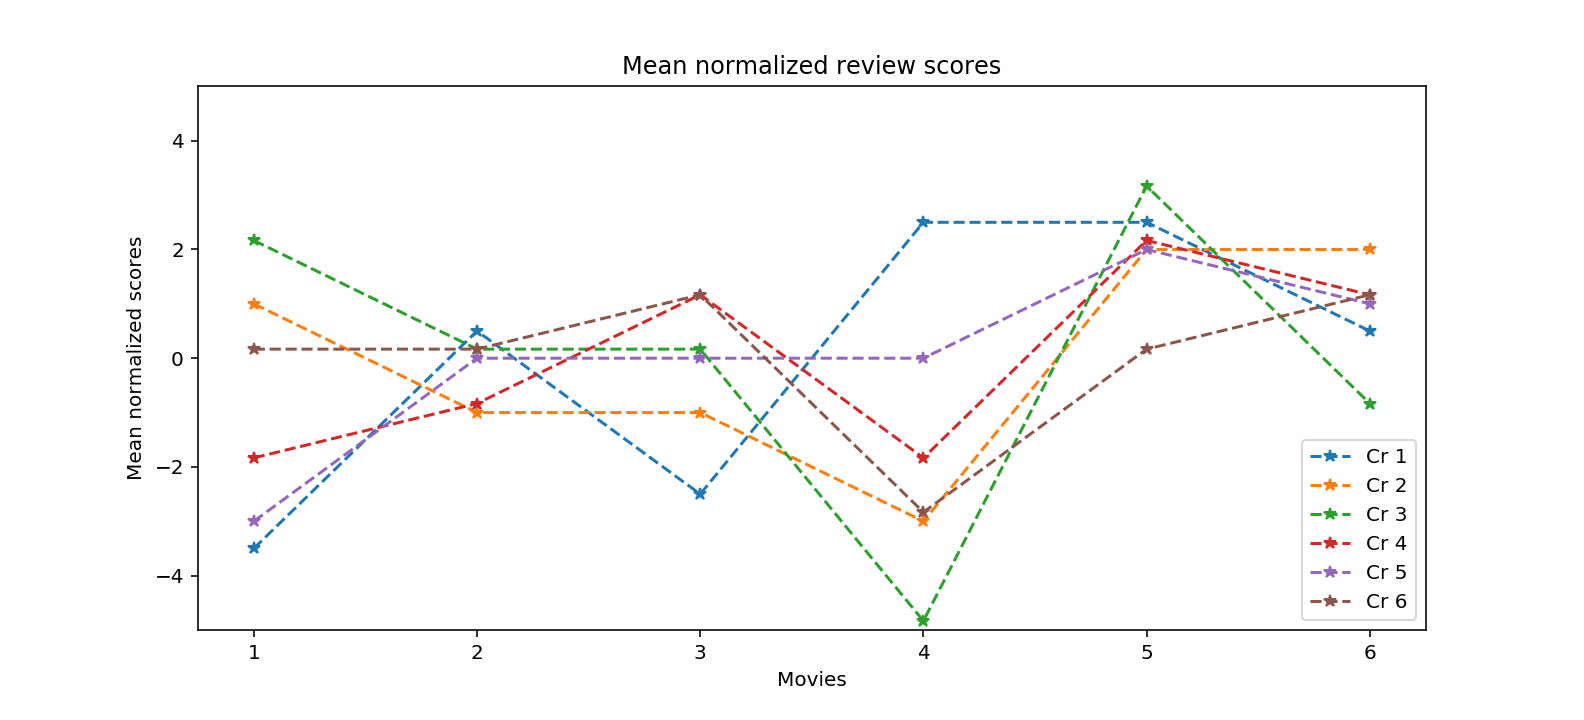

In [405]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111)

ax.set_ylim(-5,5)
ax.set_xlabel('Movies')
ax.set_ylabel('Mean normalized scores')
ax.set_title('Mean normalized review scores')
ax.plot(array(range(1,7)), A.T-x_cm, '--*')
ax.legend(['Cr 1', 'Cr 2', 'Cr 3', 'Cr 4', 'Cr 5', 'Cr 6'], loc='lower right')
fig.show()

**Figure 4:** *Mean normalized critics review scores (y-axis) for each movie (x-axis). Each coloured
line represents a different critic, and each star denotes the actual rating of that critic for the specific
movie.*

<IPython.core.display.Javascript object>


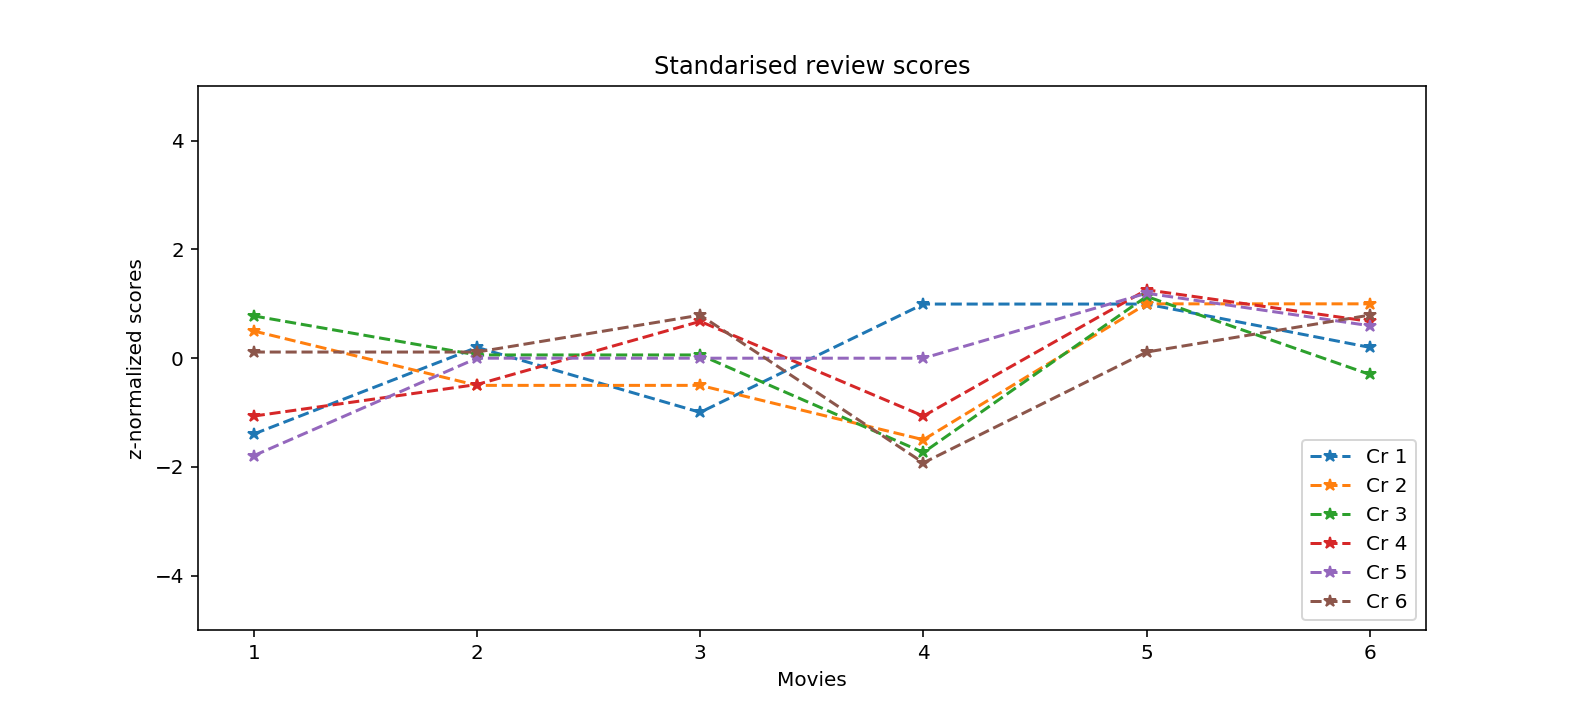

In [407]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111)

ax.set_ylim(-5,5)
ax.set_xlabel('Movies')
ax.set_ylabel('z-normalized scores')
ax.set_title('Standarised review scores')
ax.plot(array(range(1,7)), z_cm.T, '--*')
ax.legend(['Cr 1', 'Cr 2', 'Cr 3', 'Cr 4', 'Cr 5', 'Cr 6'], loc='lower right')
fig.show()

**Figure 5:** *Standardized critics review scores (y-axis) for each movie (x-axis). Each coloured line
represents a different critic, and each star denotes the actual rating of that critic for the specific
movie.*